<a href="https://www.kaggle.com/code/victoraesthete/global-hiv-analysis?scriptVersionId=215667853" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center>Global HIV Analysis<center>

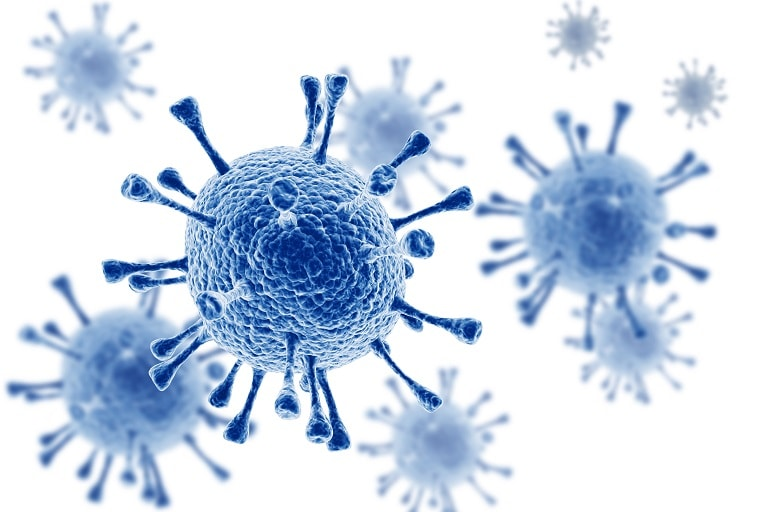
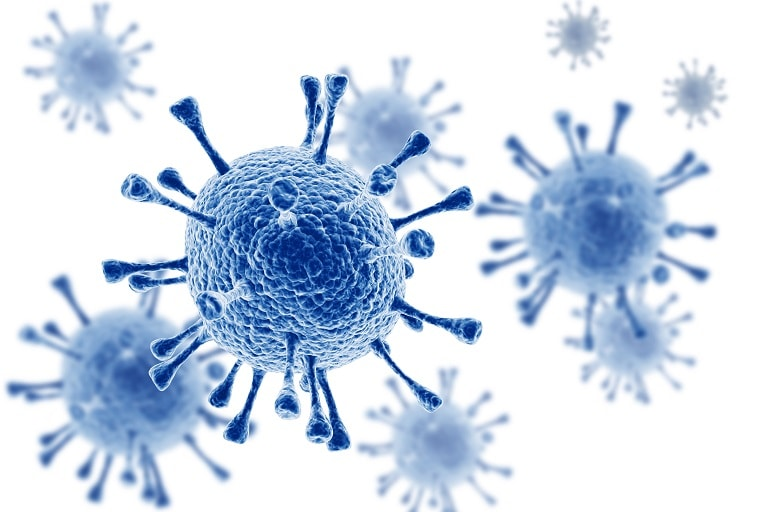
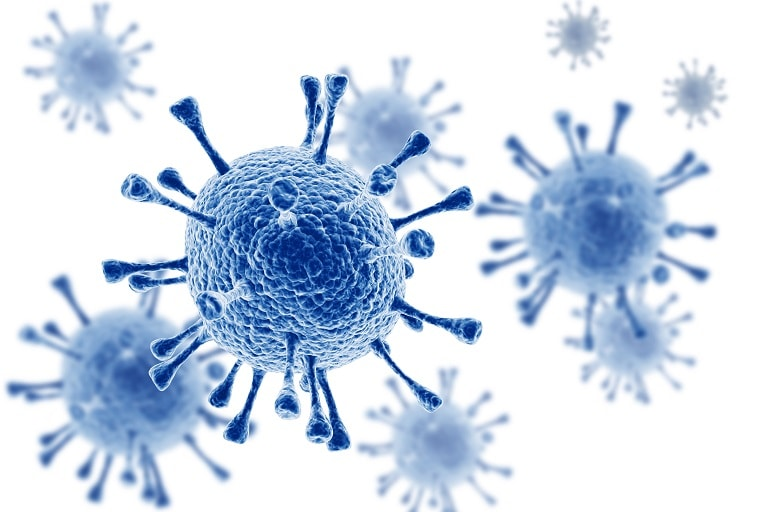
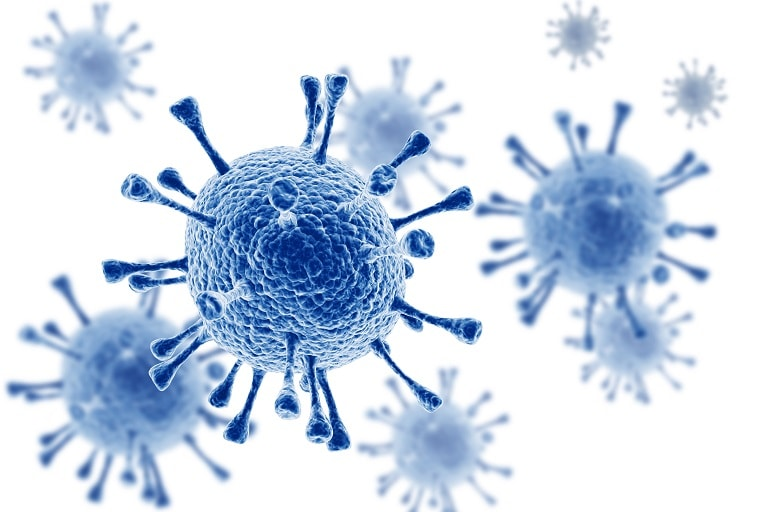

## **HIV: Understanding the Virus**

### **What is HIV?**  
HIV (*Human Immunodeficiency Virus*) is a virus that attacks the body's immune system, specifically targeting **CD4 cells (T cells)**, which are vital for fighting infections.

### **Why is it Serious?**  
If left untreated, HIV can progress to **AIDS (Acquired Immunodeficiency Syndrome)**, a condition where the immune system is too weak to defend against infections and diseases.

---

### **Management and Hope**  
While there is **no cure** for HIV, **antiretroviral therapy (ART)** can:  
- Suppress the virus effectively.  
- Help individuals lead long, healthy lives.  

---

### **Prevention is Key**  
1. **Practice Safe Behaviors:** Use protection during sexual activities.  
2. **Regular Testing:** Know your status and encourage others to do the same.  
3. **Awareness:** Promote understanding and reduce stigma.

---

### **A Message of Hope**  
> *"With knowledge, care, and treatment, HIV can be managed, and lives can thrive."*


## 1. Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/global-adult-hiv-prevalance-data-2024-updated/hiv_prevalence.csv",encoding="latin-1",delimiter=';')

In [3]:
df=df.iloc[1:,:]

In [4]:
df.sample(5)

,"Country/Region,",Adult prevalence,Number of people,Annual deaths,Year of estimate
72,Honduras,0.40%,"21,000",-,2016
137,Bosnia and Herzegovina,0.01%,350,-,2018
109,Norway[20],0.45%,"19,050",305,2024
69,Niger,0.40%,"48,000","3,400",2016
6,Namibia,13.20%,"219,330","3,880",2024


In [5]:
df.isnull().sum()

Country/Region,     0
Adult prevalence    0
Number of people    0
Annual deaths       0
Year of estimate    0
dtype: int64

>All columns in the dataset have been validated, and there are **no empty columns** present. The data is complete and ready for analysis. ✅

## 2. Numerical Analysis

In [6]:
df['Year of estimate'].value_counts()

Year of estimate
2024        63
2016        48
2023        45
2022         8
2019         7
2018         4
2021         4
2024[12]     1
2024[13]     1
2023[14]     1
2024[18]     1
2018[19]     1
2018[21]     1
2018[25]     1
2013[30]     1
Name: count, dtype: int64

> We need to Remove [] from year and convert into int

## 3. Changing Datatype

In [7]:
df["Year of estimate"] = df["Year of estimate"].str.replace(r"\[\d+\]", "", regex=True)
df["Year of estimate"] = df["Year of estimate"].astype(int)

In [8]:
df["Year of estimate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 187 entries, 1 to 187
Series name: Year of estimate
Non-Null Count  Dtype
--------------  -----
187 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 1 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country/Region,   187 non-null    object
 1   Adult prevalence  187 non-null    object
 2   Number of people  187 non-null    object
 3   Annual deaths     187 non-null    object
 4   Year of estimate  187 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 7.4+ KB


> We need to Convert other column to int as well for further analysis

In [10]:
df["Number of people"] = (
    df["Number of people"]
    .str.replace(',', '', regex=False)       # Remove commas
    .str.replace(r'\[.*\]', '', regex=True)  # Remove square brackets and the numbers inside them
    .str.replace(' ', '', regex=False)       # Remove spaces
    .replace('-', '0')                       # Replace '-' with '0'
    .astype(int)                             # Convert to integer
)

> Converted Number of people into int

In [11]:
df["Annual deaths"] = (
    df["Annual deaths"]
    .str.replace(',', '', regex=False)  # Remove commas
    .replace('-', '0')                  # Replace '-' with '0'
    .astype(int)                        # Convert to integer
)

> Converted Annual deaths into int

In [12]:
df["Adult prevalence"] = (
    df["Adult prevalence"]
    .str.extract(r'([\d\.]+)')        # Extract numeric part
    .replace("%", "", regex=False)    # Remove '%'
    .replace("-", None)               # Replace '-' with None
    .astype(float)                    # Convert to float
)
df["Adult prevalence"] = df["Adult prevalence"].fillna(0).astype(float)

> Converted Adult prevalence into float

## 4. Plotting Total Death vs Year 

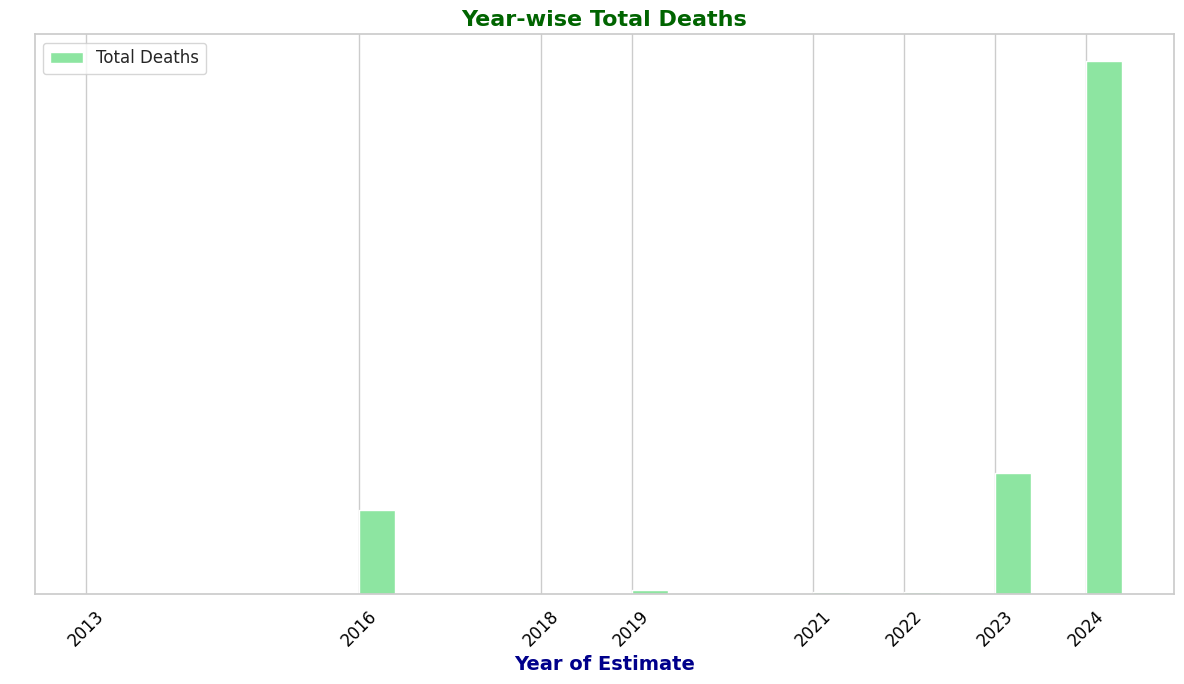

In [13]:
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
result = df.groupby("Year of estimate").sum()

plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel")  


plt.bar(result.index + 0.2, result["Annual deaths"], width=0.4, label="Total Deaths", color=colors[2])

plt.xlabel("Year of Estimate", fontsize=14, fontweight='bold', color="darkblue")
plt.ylabel(" ", fontsize=14)  
plt.title("Year-wise Total Deaths", fontsize=16, fontweight='bold', color="darkgreen")
plt.xticks(result.index, fontsize=12, rotation=45, color="black")
plt.yticks([])  
plt.legend(fontsize=12, loc="upper left")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)

plt.tight_layout()
plt.show()

> #### It is Found that **2024** have most HIV Deaths

## 5. Number of People Affected vs Year

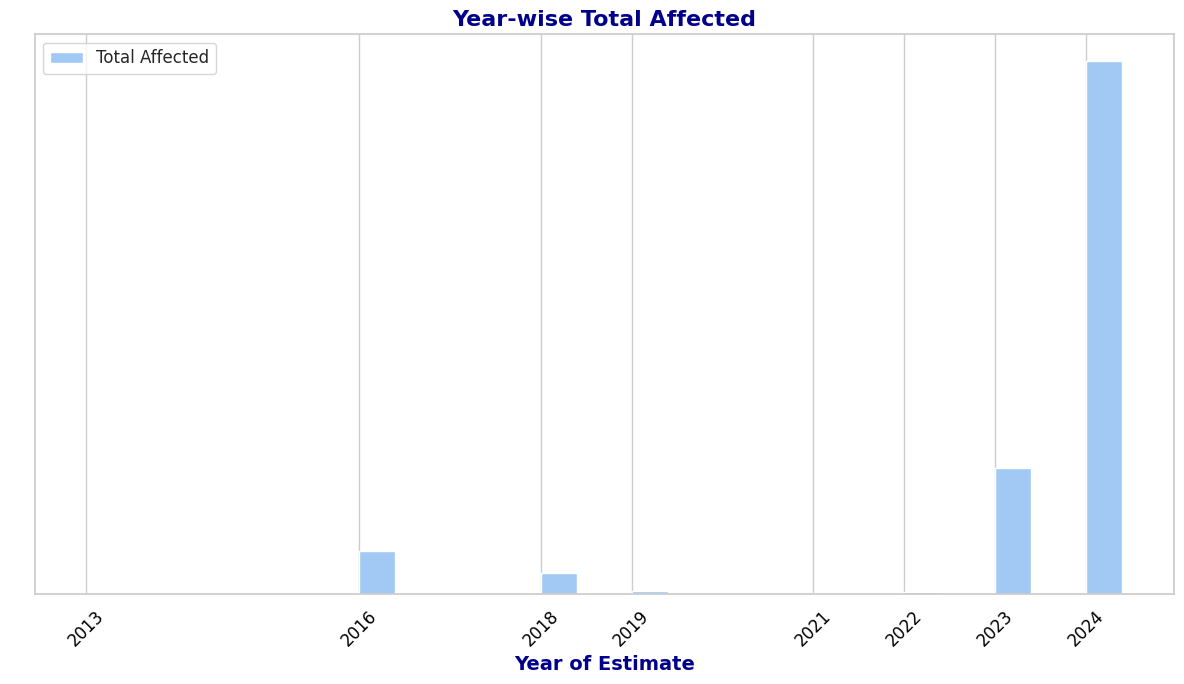

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
result = df.groupby("Year of estimate").sum()

plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel")  

plt.bar(result.index + 0.2, result["Number of people"], width=0.4, label="Total Affected", color=colors[0])

plt.xlabel("Year of Estimate", fontsize=14, fontweight='bold', color="darkblue")
plt.ylabel(" ", fontsize=14) 
plt.title("Year-wise Total Affected", fontsize=16, fontweight='bold', color="darkblue")
plt.xticks(result.index, fontsize=12, rotation=45, color="black")
plt.yticks([]) 
plt.legend(fontsize=12, loc="upper left")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)


plt.tight_layout()
plt.show()

> #### It is found that **2024 have highest** affected people

## 6. Affected People and Death Comaprision

The death percentage is calculated as   
$\text{Death Percentage} = \left( \frac{\text{Annual deaths}}{\text{Number of people}} \right) \times 100.$


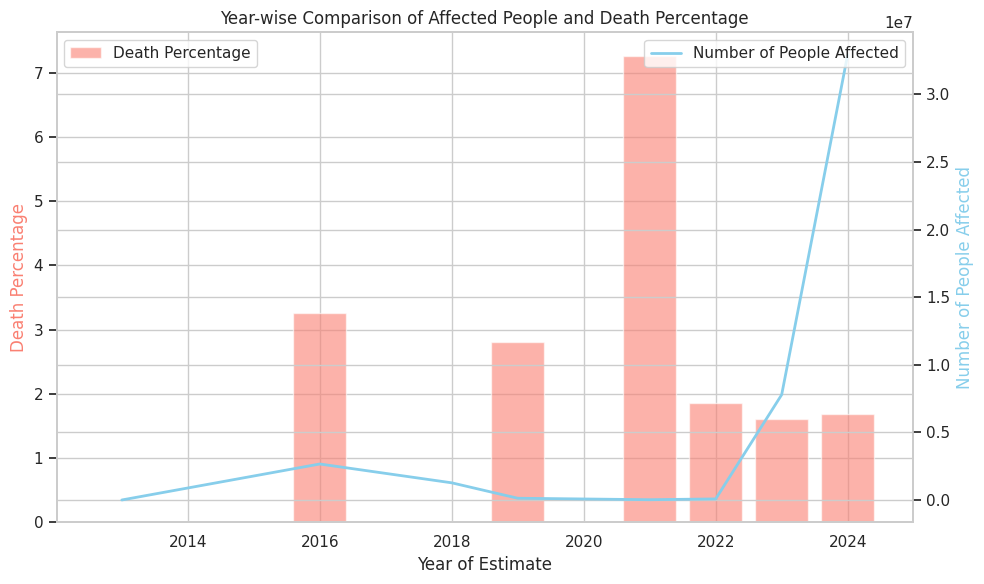

In [15]:
import matplotlib.pyplot as plt

result = df.groupby("Year of estimate").sum()
result["Death Percentage"] = (result["Annual deaths"] / result["Number of people"]) * 100


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(result.index, result["Death Percentage"], color='salmon', label="Death Percentage", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(result.index, result["Number of people"], color='skyblue', label="Number of People Affected", linewidth=2)

ax1.set_xlabel("Year of Estimate")
ax1.set_ylabel("Death Percentage", color='salmon')
ax2.set_ylabel("Number of People Affected", color='skyblue')
plt.title("Year-wise Comparison of Affected People and Death Percentage")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

> #### There was **more death in 2021** if comparing with total affected in each year

## 7. Percentage Increase in Death

In [16]:
import matplotlib.pyplot as plt

result = df.groupby("Year of estimate").sum()

result["Death Percentage Increase"] = result["Annual deaths"].pct_change() * 100
result["People Affected Percentage Increase"] = result["Number of people"].pct_change() * 100

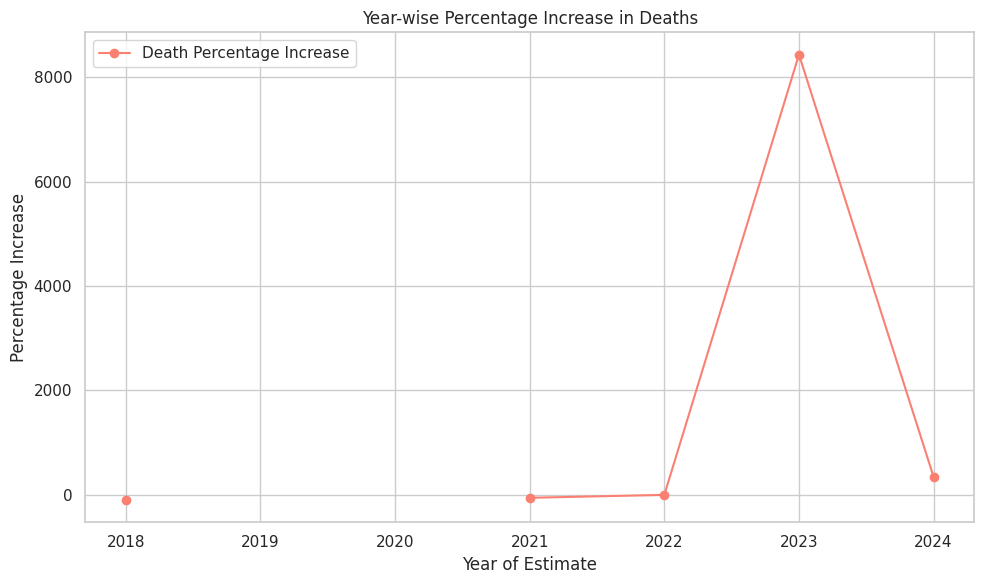

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(result.index, result["Death Percentage Increase"], marker='o', color='salmon', label="Death Percentage Increase")
plt.xlabel("Year of Estimate")
plt.ylabel("Percentage Increase")
plt.title("Year-wise Percentage Increase in Deaths")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

> #### There was **sudden increase** in total death in 2023.

## 8. Percentage Increase in Number of Affected

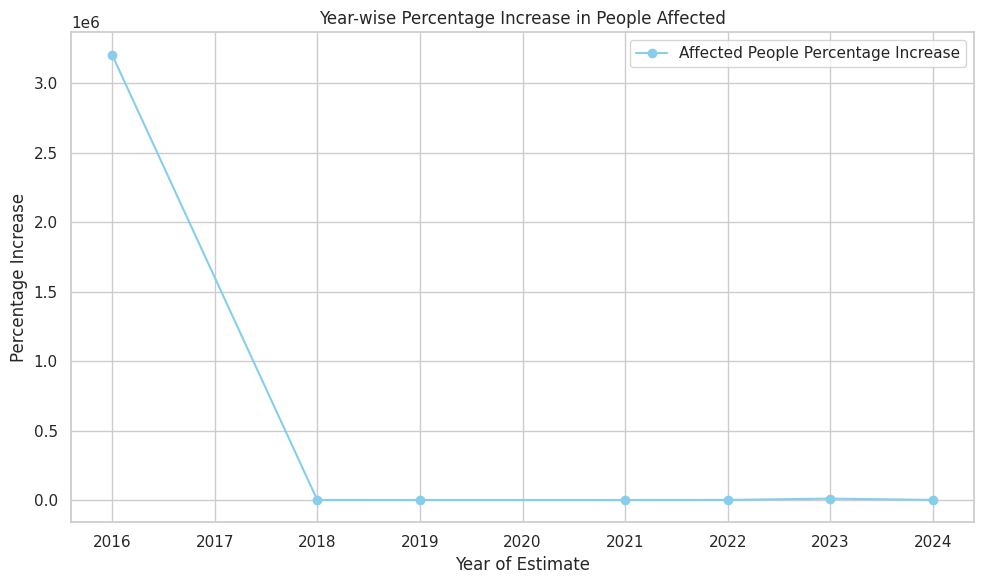

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(result.index, result["People Affected Percentage Increase"], marker='o', color='skyblue', label="Affected People Percentage Increase")
plt.xlabel("Year of Estimate")
plt.ylabel("Percentage Increase")
plt.title("Year-wise Percentage Increase in People Affected")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

> #### There is constant Percentage Increase from 2018 of **total affected people**.

## 9. Maximum Affected Location

In [19]:
df["People Affected"] = pd.to_numeric(df["Number of people"], errors='coerce')
df["Deaths"] = pd.to_numeric(df["Annual deaths"], errors='coerce')


max_affected = df.loc[df["People Affected"].idxmax()]
max_death = df.loc[df["Deaths"].idxmax()]
min_affected = df.loc[df["People Affected"].idxmin()]

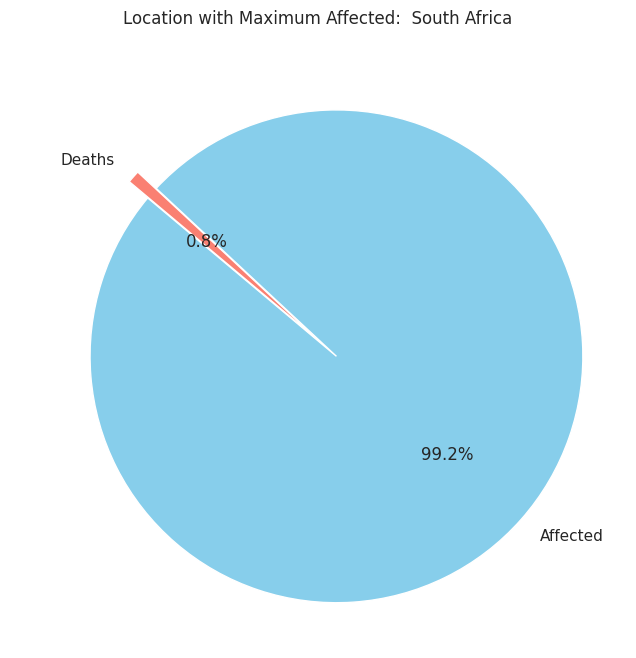

In [20]:
plt.figure(figsize=(8, 8))
labels = ['Affected', 'Deaths']
sizes = [max_affected["People Affected"], max_affected["Deaths"]]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"Location with Maximum Affected: {max_affected['Country/Region,']}")
plt.show()

> #### Maximum affected region is **South Africa**

## 10. Maximum Death Region

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


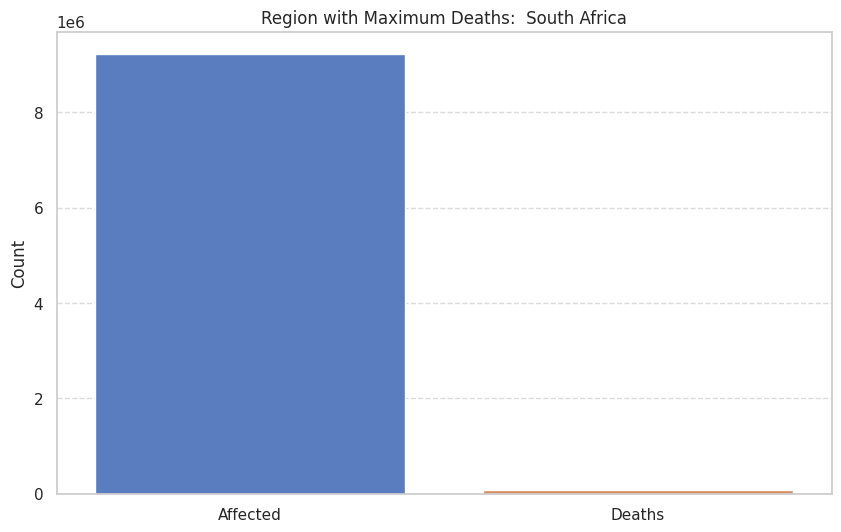

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Affected', 'Deaths'], y=[max_death["People Affected"], max_death["Deaths"]],
            palette='muted')
plt.title(f"Region with Maximum Deaths: {max_death['Country/Region,']}")
plt.ylabel("Count")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> #### Maximum Death is in **South Africa**

## 11. Minimum Affected Location

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


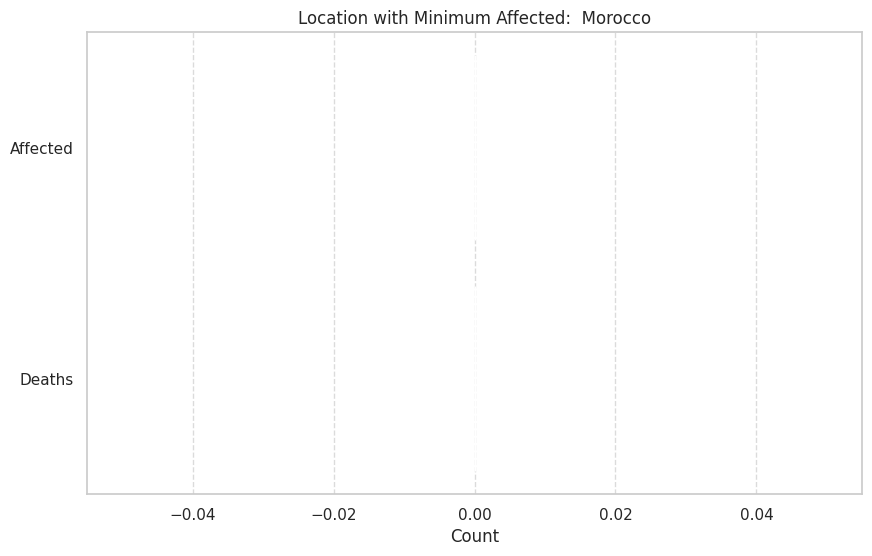

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[min_affected["People Affected"], min_affected["Deaths"]],
            y=['Affected', 'Deaths'], palette='coolwarm')
plt.title(f"Location with Minimum Affected: {min_affected['Country/Region,']}")
plt.xlabel("Count")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

> #### **Morocco** is Minimum Affected Location

## 12. Prevalence Percentage by Region

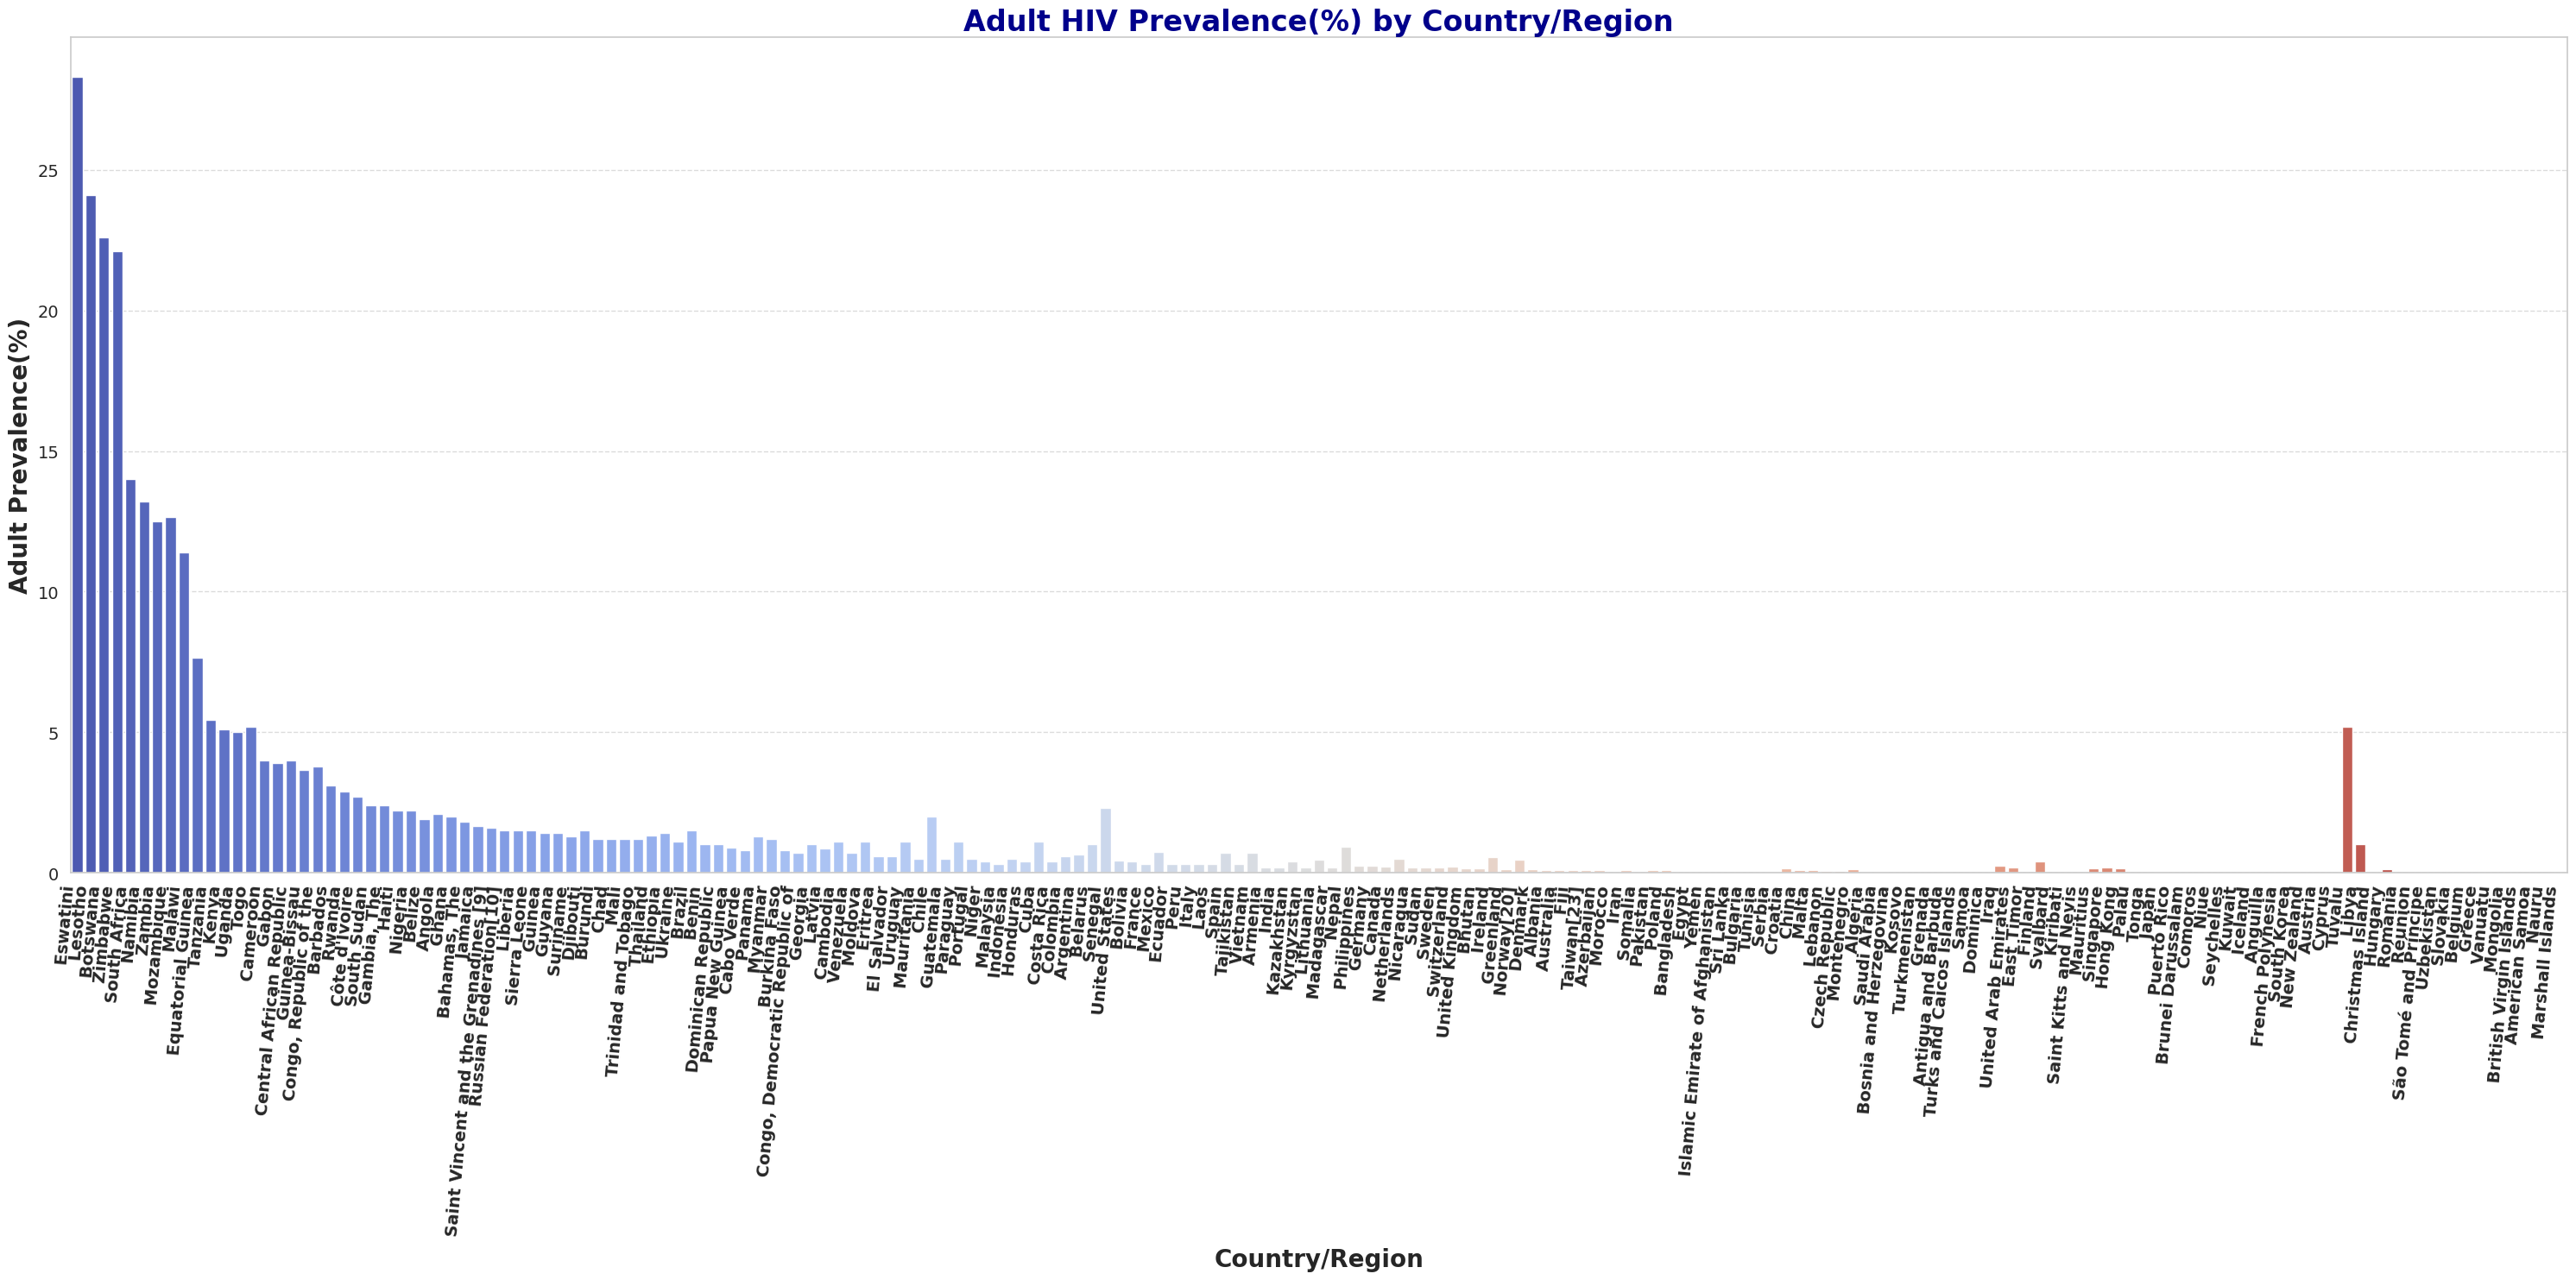

In [23]:
plt.figure(figsize=(30, 15))
sns.barplot(
    x='Country/Region,',
    y='Adult prevalence',
    data=df,
    palette='coolwarm'  # Vibrant color palette
)
plt.title('Adult HIV Prevalence(%) by Country/Region', fontsize=24, fontweight='bold', color='darkblue')
plt.xlabel('Country/Region', fontsize=20, fontweight='bold')
plt.ylabel('Adult Prevalence(%)', fontsize=20, fontweight='bold')
plt.xticks(rotation=85, ha='right', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> #### **Eswatini** have highest Adult Prevalence percentage

## 13. Prevalence% vs Annual Deaths

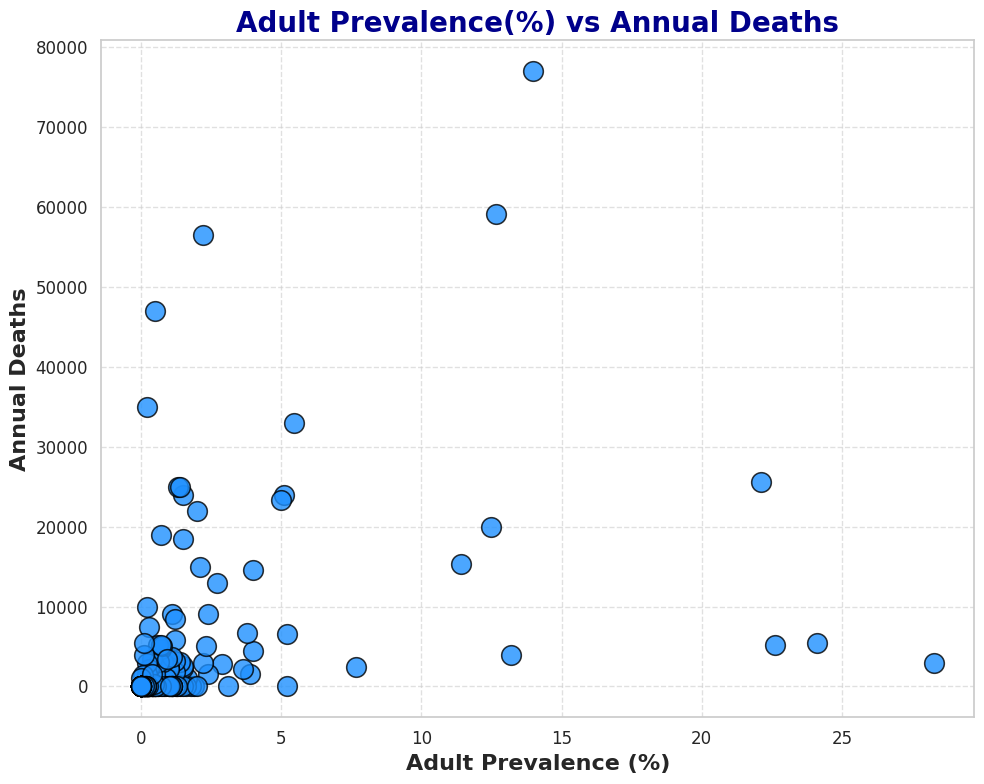

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Adult prevalence',
    y='Annual deaths',
    data=df,
    s=200,  
    color="dodgerblue",
    edgecolor="black",
    alpha=0.8  
)
plt.title('Adult Prevalence(%) vs Annual Deaths', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Adult Prevalence (%)', fontsize=16, fontweight='bold')
plt.ylabel('Annual Deaths', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 14. Correlation Analysis

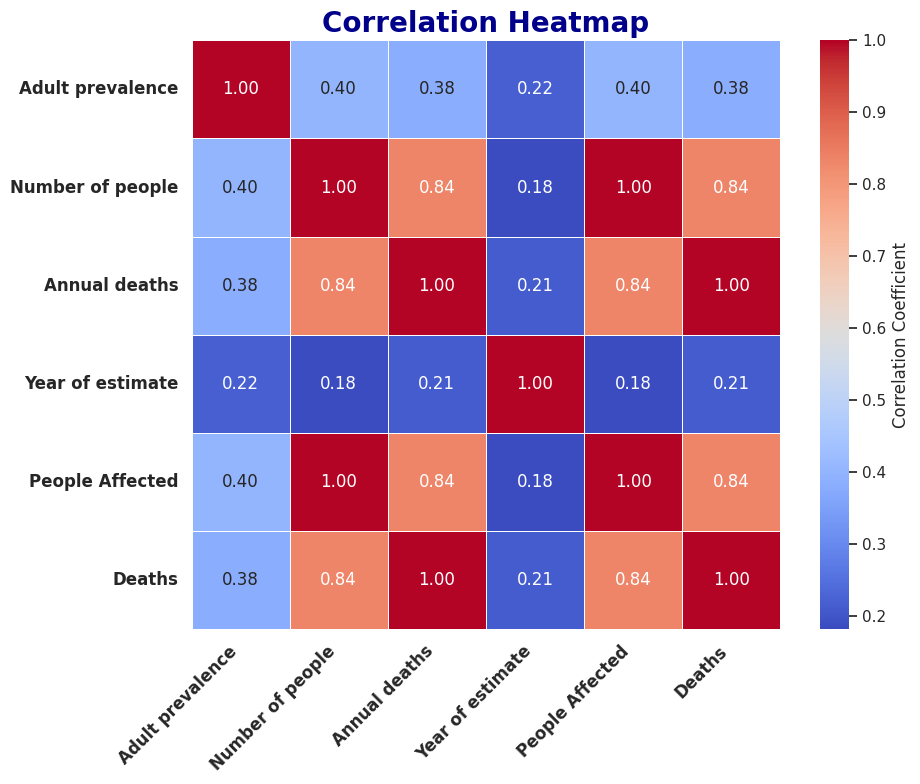

In [25]:
correlation = df.drop(columns=["Country/Region,"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True, 
    cmap='coolwarm',
    fmt='.2f',  
    cbar_kws={'label': 'Correlation Coefficient'},  
    linewidths=0.5, 
    square=True  
)
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', rotation=45, ha='right')  
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

#### --------------------------------------------------- **More to be Added** ------------------------------------------------------